In [64]:
from plotnine import *
import pandas
from sklearn import preprocessing

df=pandas.read_feather('reports/bench_report_mancorr_11Jul.feather')



In [65]:
df['rep'].value_counts()

1    8389
Name: rep, dtype: int64

In [66]:
df=df[df['rep']==1]
df=df.drop(columns=['rep'])

In [70]:
overview = df.groupby(by=['wflow', 'optimizer']).first().reset_index().drop(columns=['process_snapshot', 'exitcode'])
overview

,wflow,optimizer,bytes_memory,cpu_percent,bytes_sent,bytes_recv,wall_time,db_time
0,micro_join.py,base,1040384,"[16.7, 80.0, 33.3, 0.0]",1468484902,1468484902,62.276851,57.619797
1,micro_join.py,modin,479232,"[66.7, 75.0, 25.0, 0.0]",1471011657,1471011657,160.451906,124.148659
2,micro_join.py,optimized,0,"[11.1, 10.0, 0.0, 87.5]",2132329659,2132329659,91.908522,90.090591
3,micro_max.py,base,368640,"[40.0, 20.0, 20.0, 75.0]",139103915,139103915,5.801578,5.410194
4,micro_max.py,modin,675840,"[30.0, 0.0, 14.3, 71.4]",139495219,139495219,10.876645,5.984243
5,micro_max.py,optimized,110592,"[20.0, 20.0, 80.0, 20.0]",22844,22844,0.734470,0.425034
6,micro_proj.py,base,466944,"[0.0, 0.0, 88.9, 0.0]",1233530318,1233530318,52.108927,50.859436
7,micro_proj.py,modin,524288,"[20.0, 0.0, 0.0, 75.0]",1235377982,1235377982,118.139050,110.406563
8,micro_proj.py,optimized,1040384,"[83.3, 28.6, 0.0, 0.0]",73169620,73169620,3.685909,3.371961
9,micro_sel.py,base,831488,"[22.2, 0.0, 87.5, 0.0]",1233525558,1233525558,51.503656,50.402863


# WALL TIME

In [ ]:
wall_time_overview = overview.drop(columns=['cpu_percent', 'bytes_sent', 'bytes_recv', 'bytes_memory'])
wall_time_overview

In [51]:
wall_time_overview['wall_time_normalized'] = wall_time_overview.groupby('wflow')['wall_time'].transform(lambda x: (x/x.max()))
db_time_ratio = wall_time_overview['db_time']/wall_time_overview['wall_time']
wall_time_overview['db_time_normalized'] = db_time_ratio*wall_time_overview['wall_time_normalized']
wall_time_overview['python_time_normalized'] = \
    wall_time_overview['wall_time_normalized'] - wall_time_overview['db_time_normalized']
wall_time_overview

,wflow,optimizer,wall_time,db_time,wall_time_normalized,db_time_normalized,python_time_normalized
0,micro_join.py,base,62.276851,57.619797,0.388134,0.359109,0.029025
1,micro_join.py,modin,160.451906,124.148659,1.000000,0.773744,0.226256
2,micro_join.py,optimized,91.908522,90.090591,0.572810,0.561480,0.011330
3,micro_max.py,base,5.801578,5.410194,0.533398,0.497414,0.035984
4,micro_max.py,modin,10.876645,5.984243,1.000000,0.550192,0.449808
5,micro_max.py,optimized,0.734470,0.425034,0.067527,0.039078,0.028450
6,micro_proj.py,base,52.108927,50.859436,0.441081,0.430505,0.010576
7,micro_proj.py,modin,118.139050,110.406563,1.000000,0.934548,0.065452
8,micro_proj.py,optimized,3.685909,3.371961,0.031200,0.028542,0.002657
9,micro_sel.py,base,51.503656,50.402863,0.443277,0.433803,0.009474


In [53]:
exec_time = wall_time_overview[['wflow', 'optimizer', 'db_time_normalized', 'python_time_normalized']]

In [54]:
exec_time

,wflow,optimizer,db_time_normalized,python_time_normalized
0,micro_join.py,base,0.359109,0.029025
1,micro_join.py,modin,0.773744,0.226256
2,micro_join.py,optimized,0.561480,0.011330
3,micro_max.py,base,0.497414,0.035984
4,micro_max.py,modin,0.550192,0.449808
5,micro_max.py,optimized,0.039078,0.028450
6,micro_proj.py,base,0.430505,0.010576
7,micro_proj.py,modin,0.934548,0.065452
8,micro_proj.py,optimized,0.028542,0.002657
9,micro_sel.py,base,0.433803,0.009474


In [59]:
exec_time_melt = exec_time.melt(id_vars=['wflow', 'optimizer'], value_vars=['python_time_normalized', 'db_time_normalized'], value_name='Measurement', var_name='color')

In [60]:
exec_time_melt




,wflow,optimizer,color,Measurement
0,micro_join.py,base,python_time_normalized,0.029025
1,micro_join.py,modin,python_time_normalized,0.226256
2,micro_join.py,optimized,python_time_normalized,0.011330
3,micro_max.py,base,python_time_normalized,0.035984
4,micro_max.py,modin,python_time_normalized,0.449808
5,micro_max.py,optimized,python_time_normalized,0.028450
6,micro_proj.py,base,python_time_normalized,0.010576
7,micro_proj.py,modin,python_time_normalized,0.065452
8,micro_proj.py,optimized,python_time_normalized,0.002657
9,micro_sel.py,base,python_time_normalized,0.009474


In [61]:
# variable_cat = pandas.CategoricalDtype(categories=['python_time', 'db_time'], ordered=True)
# df['variable'] = df['variable'].astype(variable_cat)
# cdict={'python_time': C_BLUE,
#        'db_time': C_GREEN
# }
# df.rename(columns={'value':'Execution time %'}, inplace=True)

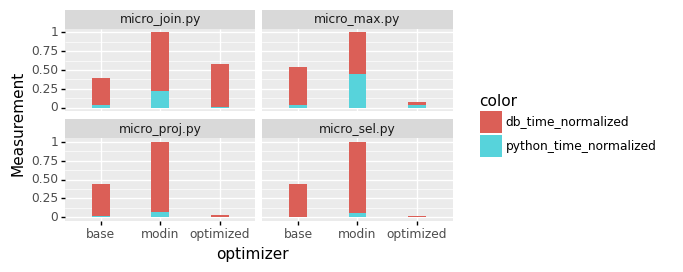

<ggplot: (122615193543)>

In [63]:
(
    ggplot(exec_time_melt, aes('optimizer', y='Measurement', fill='color'))
    + geom_col(width=0.3)
    #+ scale_fill_manual(values=cdict) 
    + facet_wrap('wflow')
    + theme(figure_size=(5, 2.5))
)


In order to explain these results, we also ran microbenchmarks: workflows consisting of a single operation on the dataset. The following list provides a quick overview of the microbenchmarks, all of which were expressed in pandas:
- join (Two database tables are pulled from the RDBMS and an inner join is performed)
- max (A database table is pulled from the RDBMS and a maximum of a column is calculated)
- projection (A database table is pulled from the RDBMS and a subset of the columns are removed inside the python runtime)
- selection (A database table is pulled from the RDBMS and a subset of the rows are removed inside the python runtime)
For a detailed look at the microbenchmarks, one can see the workflows inside the "benchmarks" folder in the project's git repositoty. It should be noted that none of the microbenchmarks modify tables inside the RDBMS.

Since the various microbenchmark workflows have different base runtimes (e.g. aggregations were 10 times faster in this specific measurement), the values we see in the above graphic are normalized, such that the slowest optimization method has a value of 1. Lower values are better.  We can see that our optimizer generally performed better than both modin and standard pandas "base".

To gain better insight about this, we split the overall wall time between the time it took the database to deliver the queried data "DB time" and the time it took the python environment to execute the operation "Python time". As expected, our performing operator pushdown to RDBMS practically eliminates "Python time". What is arguably more interesting, is that in most cases performing the pushdown also decreased "DB time". 

In [119]:
bytes_recv = overview[['wflow', 'optimizer', 'bytes_recv']]
bytes_recv['Gbytes_recv'] = bytes_recv['bytes_recv'] / (10**9)

<ipython-input-119-bf5a82cb63e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


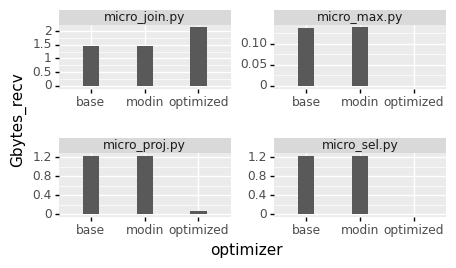

<ggplot: (122617434751)>

In [120]:
(
    ggplot(bytes_recv, aes('optimizer', y='Gbytes_recv'))
    + geom_col(width=0.3)
    #+ scale_fill_manual(values=cdict) 
    + facet_wrap('wflow', scales='free')
    + theme(figure_size=(5, 2.5),
           subplots_adjust={'hspace': 1, 'wspace': 0.25})
)

#.first().reset_index().drop(columns=['process_snapshot', 'exitcode'])